In [3]:
# import liana
import liana as li
# needed for visualization and toy data
import scanpy as sc
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/astear/pkgs/miniforge3/envs/CellPhoneDB/lib/python3.11/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.


# Basic Analysis of Breast and Lung

- Get cell number per tissue
- get number cell type per tissue 
- get average gene per tissue 

Go through each method showing the spatial presentation it can do 

then heatmaps of gene, heatmap of Jaccard inde

## cell number per tissue

In [4]:
path = "/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium/xenium_objs/anndata/breast_B1_1.h5ad"
chuvio_B1_1 = sc.read_h5ad(path)
path = "/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium/xenium_objs/anndata/breast_B1_2.h5ad"
chuvio_B1_2 = sc.read_h5ad(path)
path = "/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium/xenium_objs/anndata/breast_B2_1.h5ad"
chuvio_B2_1 = sc.read_h5ad(path)
path = "/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium/xenium_objs/anndata/breast_B3_1.h5ad"
chuvio_B3_1 = sc.read_h5ad(path)
path = "/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium/xenium_objs/anndata/breast_B4_1.h5ad"
chuvio_B4_1 = sc.read_h5ad(path)

In [5]:
path = "/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/astear/data/rcd_annot/chuvio_L1_1_RCTD_lvl3.h5ad"
chuvio_L1_1 = sc.read_h5ad(path)
path = "/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/astear/data/rcd_annot/chuvio_L1_2_RCTD_lvl3.h5ad"
chuvio_L1_2 = sc.read_h5ad(path)
path = "/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/astear/data/rcd_annot/chuvio_L2_1_RCTD_lvl3.h5ad"
chuvio_L2_1 = sc.read_h5ad(path)
path = "/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/astear/data/rcd_annot/chuvio_L3_1_RCTD_lvl3.h5ad"
chuvio_L3_1 = sc.read_h5ad(path)
path = "/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/astear/data/rcd_annot/chuvio_L4_1_RCTD_lvl3.h5ad"
chuvio_L4_1 = sc.read_h5ad(path)

In [27]:
chuvio_L1_1.obs

AnnData object with n_obs × n_vars = 71187 × 313
    obs: 'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'sample_id', 'sum', 'detected', 'subsets_Mito_sum', 'subsets_Mito_detected', 'subsets_Mito_percent', 'total', 'libsize_drop', 'sizeFactor', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.8', 'seurat_clusters', 'singler_annotation', 'ident', 'RCTD_lvl3'
    uns: 'X_name'
    obsm: 'PCA', 'TSNE', 'UMAP'
    layers: 'logcounts'

In [19]:
chuvio_B1_1.layers['logcounts']

<123565x270 sparse matrix of type '<class 'numpy.float64'>'
	with 6789942 stored elements in Compressed Sparse Column format>

chuvio_B1_1, chuvio_B1_2, chuvio_B2_1, chuvio_B3_1, chuvio_B4_1, chuvio_L1_1, chuvio_L1_2, chuvio_L2_1, chuvio_L3_1, chuvio_L4_1

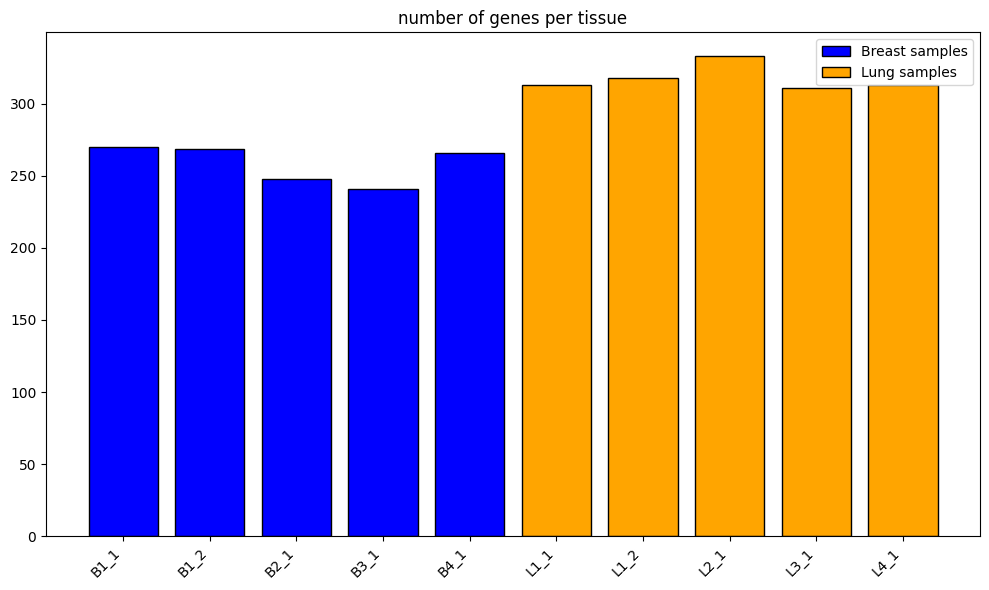

In [6]:
lengths = [
    chuvio_B1_1.layers['logcounts'].toarray().shape[1],
    chuvio_B1_2.layers['logcounts'].toarray().shape[1],
    chuvio_B2_1.layers['logcounts'].toarray().shape[1],
    chuvio_B3_1.layers['logcounts'].toarray().shape[1],
    chuvio_B4_1.layers['logcounts'].toarray().shape[1],
    chuvio_L1_1.layers['logcounts'].toarray().shape[1],
    chuvio_L1_2.layers['logcounts'].toarray().shape[1],
    chuvio_L2_1.layers['logcounts'].toarray().shape[1],
    chuvio_L3_1.layers['logcounts'].toarray().shape[1],
    chuvio_L4_1.layers['logcounts'].toarray().shape[1]
]

labels = [
    'B1_1',
    'B1_2',
    'B2_1',
    'B3_1',
    'B4_1', 
    'L1_1',
    'L1_2',
    'L2_1',
    'L3_1',
    'L4_1'
]

colors = ['blue'] * 5 + ['orange'] * 5

# Create bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, lengths, color=colors, edgecolor='black')
plt.title('number of genes per tissue')
plt.xticks(rotation=45, ha='right')

# Add custom legend
legend_elements = [Patch(facecolor='blue', edgecolor='black', label='Breast samples'),
                   Patch(facecolor='orange', edgecolor='black', label='Lung samples')]
plt.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()

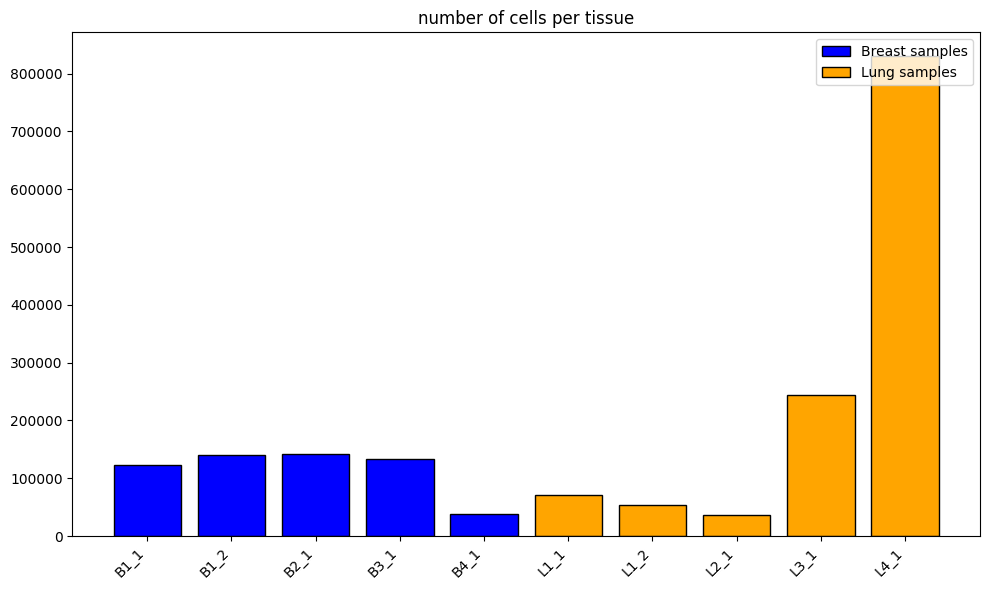

In [8]:
lengths = [
    len(chuvio_B1_1),
    len(chuvio_B1_2),
    len(chuvio_B2_1),
    len(chuvio_B3_1),
    len(chuvio_B4_1),
    len(chuvio_L1_1),
    len(chuvio_L1_2),
    len(chuvio_L2_1),
    len(chuvio_L3_1),
    len(chuvio_L4_1)
]

labels = [
    'B1_1',
    'B1_2',
    'B2_1',
    'B3_1',
    'B4_1', 
    'L1_1',
    'L1_2',
    'L2_1',
    'L3_1',
    'L4_1'
]

colors = ['blue'] * 5 + ['orange'] * 5

# Create bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, lengths, color=colors, edgecolor='black')
plt.title('number of cells per tissue')
plt.xticks(rotation=45, ha='right')

# Add custom legend
legend_elements = [Patch(facecolor='blue', edgecolor='black', label='Breast samples'),
                   Patch(facecolor='orange', edgecolor='black', label='Lung samples')]
plt.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()

In [2]:
#Check the number of genes in the lung and breast tissues

In [3]:
#Get the number of signifcant genes 

In [9]:
B1_1 = 5
B1_2 = 5
B2_1 = 4
B3_1 = 5
B4_1 = 5
L1_1 = 49
L1_2 = 50
L2_1 = 53
L3_1 = 55
L4_1 = 45

In [7]:
lengths = [
    B1_1, 
B1_2, 
B2_1, 
B3_1, 
B4_1, 
L1_1 , 
L1_2 , 
L2_1 , 
L3_1 , 
L4_1 , 
]

labels = [
    'B1_1',
    'B1_2',
    'B2_1',
    'B3_1',
    'B4_1', 
    'L1_1',
    'L1_2',
    'L2_1',
    'L3_1',
    'L4_1'
]

colors = ['blue'] * 5 + ['orange'] * 5

# Create bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, lengths, color=colors, edgecolor='black')
plt.title('number of cells per tissue')
plt.xticks(rotation=45, ha='right')

# Add custom legend
legend_elements = [Patch(facecolor='blue', edgecolor='black', label='Breast samples'),
                   Patch(facecolor='orange', edgecolor='black', label='Lung samples')]
plt.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()

NameError: name 'B1_1' is not defined

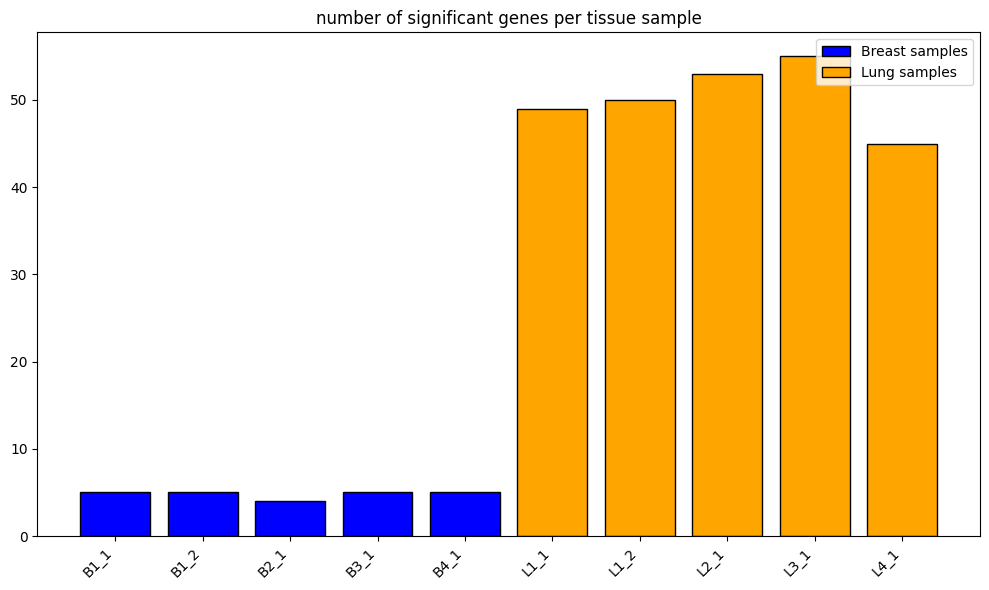

In [10]:
lengths = [
    B1_1, 
B1_2, 
B2_1, 
B3_1, 
B4_1, 
L1_1 , 
L1_2 , 
L2_1 , 
L3_1 , 
L4_1 , 
]

labels = [
    'B1_1',
    'B1_2',
    'B2_1',
    'B3_1',
    'B4_1', 
    'L1_1',
    'L1_2',
    'L2_1',
    'L3_1',
    'L4_1'
]

colors = ['blue'] * 5 + ['orange'] * 5

# Create bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, lengths, color=colors, edgecolor='black')
plt.title('number of significant genes per tissue sample')
plt.xticks(rotation=45, ha='right')

# Add custom legend
legend_elements = [Patch(facecolor='blue', edgecolor='black', label='Breast samples'),
                   Patch(facecolor='orange', edgecolor='black', label='Lung samples')]
plt.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()

In [28]:
import pandas as pd

# Data
data = {
    'spatial_method': [
        'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
        'no', 'no', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
        'yes', 'yes'
    ],
    'data': [
        2017, 2018, 2020, 2021, 2019, 2020, 2019, 2019, 2020, 2020,
        2019, 2020, 2019, 2020, 2020, 2021, 2020, 2020, 2023, 2022, 2021
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)

   spatial_method  data
0              no  2017
1              no  2018
2              no  2020
3              no  2021
4              no  2019
5              no  2020
6              no  2019
7              no  2019
8              no  2020
9              no  2020
10             no  2019
11             no  2020
12             no  2019
13            yes  2020
14            yes  2020
15            yes  2021
16            yes  2020
17            yes  2020
18            yes  2023
19            yes  2022
20            yes  2021


In [16]:
#Import a csv of spatial methods, data. 
import pandas as pd

# Load the CSV into a pandas DataFrame
data_df = pd.read_csv('year_article .csv')

In [17]:
data_df

,method name,year of publishing,uses spatial
0,CellChat,2017,no
1,CellPhoneDB,2018,no
2,communet,2020,no
3,ICELLNET,2021,no
4,iTALK,2019,no
5,NATMI,2020,no
6,PymineR,2019,no
7,scTensor,2019,no
8,SingleCellSignalR,2020,no
9,cytotalk,2020,no


In [ ]:
data = {
    'spatial_method': [
        'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
        'no', 'no', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
        'yes', 'yes'
    ],
    'data': [
        2017, 2018, 2020, 2021, 2019, 2020, 2019, 2019, 2020, 2020,
        2019, 2020, 2019, 2020, 2020, 2021, 2020, 2020, 2021, 2022, 2021
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

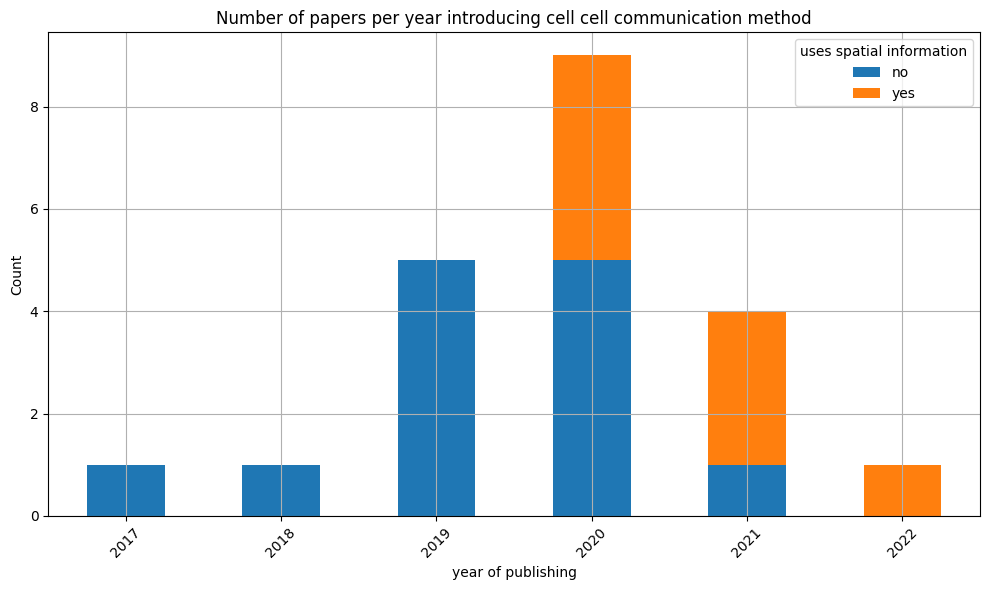

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Data
df = data_df

# Group by 'data' (year) and 'spatial_method', then count occurrences
count_data = df.groupby(['year of publishing', 'uses spatial']).size().unstack(fill_value=0)

# Plot the data
count_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# Customize the plot
plt.title('Number of papers per year introducing cell cell communication method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='uses spatial information')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()
